In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

(150, 4)


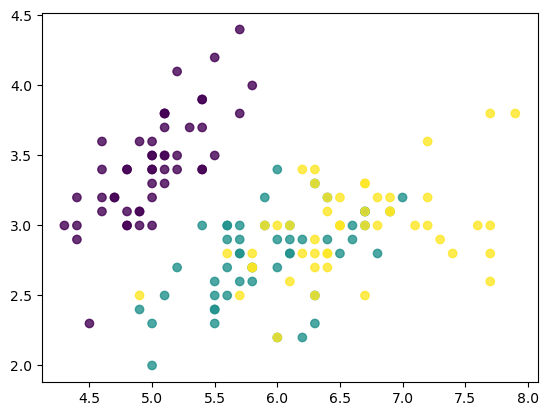

In [2]:
iris = load_iris()

X = iris.data
y = iris.target

print(X.shape)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train set : ", X_train.shape)
print("Test set : ", X_test.shape)

Train set :  (120, 4)
Test set :  (30, 4)


Text(0.5, 1.0, 'Test set')

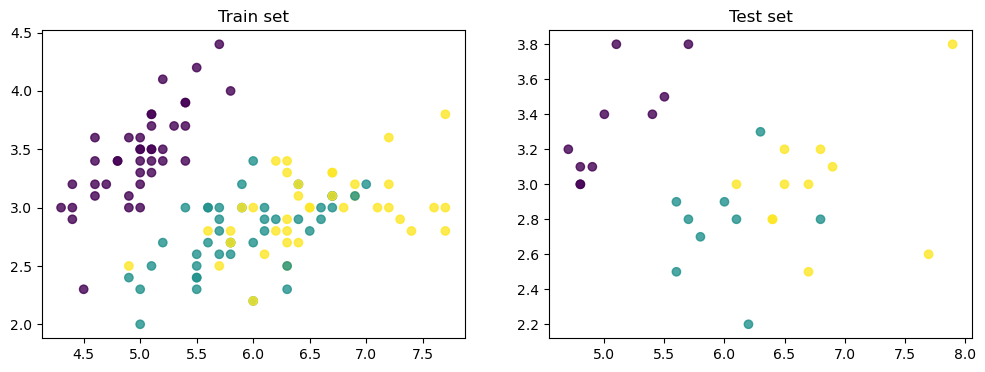

In [5]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.8)
plt.title("Train set")
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.8)
plt.title("Test set")

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
model = KNeighborsClassifier(n_neighbors=6)

model.fit(X_train, y_train)
print("Trian score : ", model.score(X_train, y_train))
print("Test set ", model.score(X_test, y_test))

Trian score :  0.9666666666666667
Test set  1.0


In [8]:
from sklearn.model_selection import cross_val_score

In [17]:
cross_val_score(KNeighborsClassifier(6), X_train, y_train, cv=5, scoring='accuracy').mean()

0.9416666666666667

In [19]:
score_val = []
for i in range(1, 50):
    score = cross_val_score(KNeighborsClassifier(i), X_train, y_train, cv=5, scoring='accuracy').mean()
    score_val.append(score)

0.9583333333333334
2


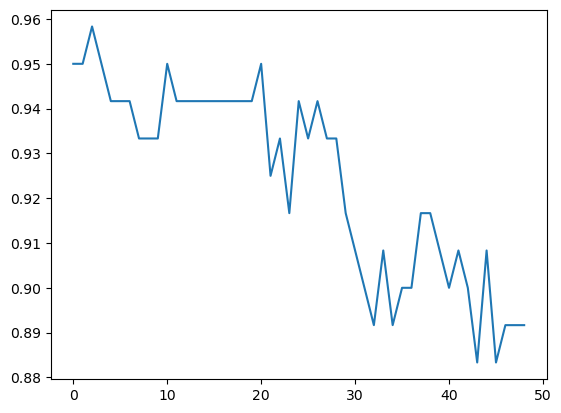

In [30]:
plt.plot(score_val)
print(max(score_val))
print(score_val.index(max(score_val)))

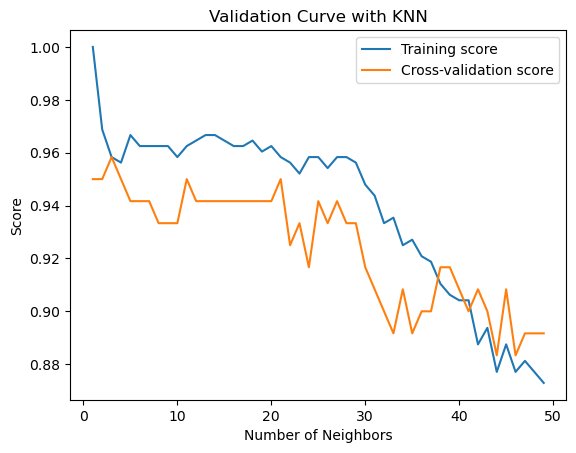

In [31]:
from sklearn.model_selection import validation_curve

param_range = np.arange(1, 50)
train_scores, test_scores = validation_curve(
    KNeighborsClassifier(), X_train, y_train, param_name="n_neighbors", param_range=param_range, cv=5, scoring="accuracy"
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(param_range, train_scores_mean, label="Training score")
plt.plot(param_range, test_scores_mean, label="Cross-validation score")
plt.title("Validation Curve with KNN")
plt.xlabel("Number of Neighbors")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()